<a href="https://colab.research.google.com/github/abxda/python-stats/blob/main/STAT_Semana_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Introducción a la Inferencia Estadística

La **inferencia estadística** es el proceso de utilizar datos de una **muestra** para hacer generalizaciones o inferencias sobre la **población** de la cual se obtuvo la muestra.

En sistemas de control y medición, la inferencia estadística es esencial para:

* **Estimar parámetros desconocidos:** Por ejemplo, la cantidad promedio de pedidos recibidos en una cadena logística o el porcentaje de productos defectuosos en un proceso de fabricación.
* **Tomar decisiones basadas en datos:** Por ejemplo, determinar si un nuevo sistema de gestión de inventario está mejorando el rendimiento o si se necesitan ajustes en un proceso de producción para cumplir con los estándares de calidad.

**Conceptos clave:**

* **Población:** Conjunto completo de elementos o individuos que son de interés para un estudio.
* **Muestra:** Subconjunto de la población que se selecciona para el estudio.
* **Parámetro:** Valor numérico que describe una característica de la población (generalmente desconocido).
* **Estimador:** Valor numérico calculado a partir de una muestra que se utiliza para estimar un parámetro poblacional.

## 2. Intervalos de Confianza

Un **intervalo de confianza** es un rango estimado de valores que se obtiene a partir de una *muestra de datos*. Este intervalo se construye con el propósito de indicar, con un *nivel específico de probabilidad*, dónde se espera que se encuentre el verdadero valor de un **parámetro poblacional desconocido**. Por ejemplo, podríamos decir que estamos *95% seguros* de que la estatura promedio de todos los adultos en un país está entre 170 y 175 cm, basándonos en mediciones de una muestra de 1000 adultos seleccionados al azar. Este rango de 170 a 175 cm sería nuestro **intervalo de confianza**, y el 95% representa nuestro **nivel de confianza** en que el verdadero promedio poblacional se encuentra dentro de ese intervalo.

**Interpretación del intervalo de confianza:**

La interpretación correcta de un intervalo de confianza se basa en la repetición hipotética del proceso de muestreo. Si construyéramos múltiples intervalos de confianza del 95% para la estatura promedio de los adultos en un país, cada uno basado en diferentes muestras de 1000 personas, esperaríamos que aproximadamente el 95% de estos intervalos contuvieran el **verdadero valor de la estatura promedio** de la población. Por ejemplo, si realizáramos este proceso 100 veces, aproximadamente 95 de los intervalos resultantes incluirían la *estatura promedio real* de todos los adultos del país. Es importante destacar que cualquier intervalo individual tiene una probabilidad del 95% de contener el verdadero valor, pero no podemos estar seguros de si un intervalo específico es uno de los que lo contiene o no.

**Nivel de confianza:**

El nivel de confianza, comúnmente representado como (1-α), es un concepto fundamental en la construcción de intervalos de confianza. Este valor indica la *probabilidad* de que el intervalo calculado contenga el **verdadero valor del parámetro poblacional**. Se expresa típicamente como un porcentaje, siendo los más comunes 90%, 95% y 99%. Por ejemplo, en nuestro caso de la estatura promedio, un nivel de confianza del 95% significa que estamos utilizando un método que, a largo plazo, producirá intervalos que contienen el verdadero promedio poblacional en el 95% de los casos.

Es importante entender que existe una relación inversa entre la amplitud del intervalo y el nivel de confianza. Un *mayor nivel de confianza* implica un *intervalo más amplio*. Por ejemplo, un intervalo de confianza del 99% para la estatura promedio sería más amplio que uno del 95%, quizás extendiéndose de 169 a 176 cm en lugar de 170 a 175 cm. Esto refleja el compromiso entre la confianza en nuestras estimaciones y la precisión de las mismas.

**Valor crítico en intervalos de confianza:**

El *valor crítico*, comúnmente representado como Z o t, es un componente esencial en la construcción de intervalos de confianza. Este valor está **directamente relacionado con el nivel de confianza** que hemos elegido y la *distribución de probabilidad* que sigue nuestra estadística muestral.

En el contexto de nuestro ejemplo sobre la estatura promedio, el valor crítico nos ayuda a determinar *qué tan lejos* debemos extender nuestro intervalo desde la media muestral para alcanzar el nivel de confianza deseado. Por ejemplo, para un nivel de confianza del 95% y asumiendo una distribución normal, utilizaríamos un valor Z de aproximadamente 1.96.

La elección entre usar Z o t depende principalmente del *tamaño de la muestra* y de si conocemos la **desviación estándar poblacional**:

- Usamos Z cuando la muestra es grande (generalmente n > 30) o cuando conocemos la desviación estándar poblacional.
- Optamos por t cuando la muestra es pequeña y desconocemos la desviación estándar poblacional.

En la práctica, estos valores se obtienen de tablas estadísticas o, más comúnmente, mediante funciones en software estadístico. Por ejemplo, si aumentáramos nuestro nivel de confianza al 99% para el intervalo de la estatura promedio, nuestro valor crítico Z cambiaría a aproximadamente 2.58, resultando en un intervalo más amplio.

Es crucial entender que el valor crítico *no es arbitrario*, sino que se deriva matemáticamente para asegurar que el intervalo resultante tenga exactamente la probabilidad deseada de contener el verdadero parámetro poblacional.

**Pruebas de una cola y dos colas:**

En el contexto de los intervalos de confianza y las pruebas de hipótesis, es importante entender la diferencia entre las pruebas de una cola y dos colas:

1. **Prueba de una cola:** En este tipo de prueba, estamos interesados en si un parámetro poblacional es mayor o menor que un valor específico, pero no en ambas direcciones simultáneamente. Por ejemplo, podríamos querer saber si la estatura promedio de los adultos en un país es mayor que 170 cm, sin preocuparnos si es menor.

2. **Prueba de dos colas:** En una prueba de dos colas, estamos interesados en cualquier desviación del valor hipotético, ya sea por encima o por debajo. Por ejemplo, podríamos querer saber si la estatura promedio de los adultos en un país es diferente de 170 cm, sin especificar si esperamos que sea mayor o menor.

La elección entre una prueba de una cola o dos colas afecta cómo se distribuye el nivel de significancia (α) y, por lo tanto, cómo se calculan los valores críticos:

- En una prueba de una cola con un nivel de confianza del 95%, todo el 5% de la región crítica se encuentra en un extremo de la distribución.
- En una prueba de dos colas con un nivel de confianza del 95%, el 5% de la región crítica se divide equitativamente entre ambos extremos de la distribución (2.5% en cada cola).

Esta distinción es crucial al usar funciones como `norm.ppf` para calcular valores críticos, ya que afecta directamente los argumentos que se pasan a la función.

**Uso de norm.ppf en la estimación de intervalos de confianza:**

La función `norm.ppf` de `scipy.stats` es una herramienta valiosa para calcular los valores críticos en la construcción de intervalos de confianza. Esta función toma un porcentaje y devuelve un multiplicador de desviación estándar para ese valor en la distribución normal. Por ejemplo, `norm.ppf(0.95, loc=0, scale=1)` devuelve un valor que marca dónde se encuentra el 95% de los puntos de datos en una prueba de una cola en una distribución normal estándar.

En un ejemplo práctico, para calcular el valor en el que se encuentra nuestro intervalo de significancia del 95% (para una prueba de una cola), usaríamos `norm.ppf(0.95, loc=172.7815, scale=4.1532)`. Este valor marca dónde se encontrarían el 95% de los puntos de datos si nuestros datos siguen una distribución normal.

Para una prueba de dos colas, debemos dividir el nivel de significancia entre ambas colas. Para un nivel de significancia del 95%, esto implicaría usar `norm.ppf(0.975, loc=172.7815, scale=4.1532)`, ya que estamos interesados en los valores en ambos extremos de nuestra media.

**Aclaración sobre loc y scale:**

En el contexto de `norm.ppf` y la construcción de intervalos de confianza:

- `loc` representa la media. En nuestro ejemplo, 172.7815 es la media muestral, no la poblacional. Usamos la media muestral porque generalmente no conocemos la verdadera media poblacional (que es lo que estamos tratando de estimar).

- `scale` representa la desviación estándar. El valor 4.1532 en nuestro ejemplo es la desviación estándar muestral. Si conociéramos la desviación estándar poblacional, la usaríamos aquí. Sin embargo, en la mayoría de los casos prácticos, solo tenemos acceso a la desviación estándar muestral.

Es importante notar que al usar la desviación estándar muestral en lugar de la poblacional, especialmente para muestras pequeñas, deberíamos considerar usar la distribución t de Student en lugar de la distribución normal. Sin embargo, para muestras grandes (generalmente n > 30), la distribución normal es una buena aproximación.

El uso de estos valores muestrales en lugar de los poblacionales refleja la realidad de la inferencia estadística: estamos utilizando información de una muestra para hacer estimaciones sobre una población. Esta es la esencia de por qué construimos intervalos de confianza en primer lugar - para cuantificar la incertidumbre en nuestras estimaciones debido a la variabilidad muestral.

Finalmente, el margen de error en la estimación de un parámetro poblacional se puede calcular utilizando el valor devuelto por `norm.ppf` multiplicado por la desviación estándar de nuestra distribución. Por ejemplo:




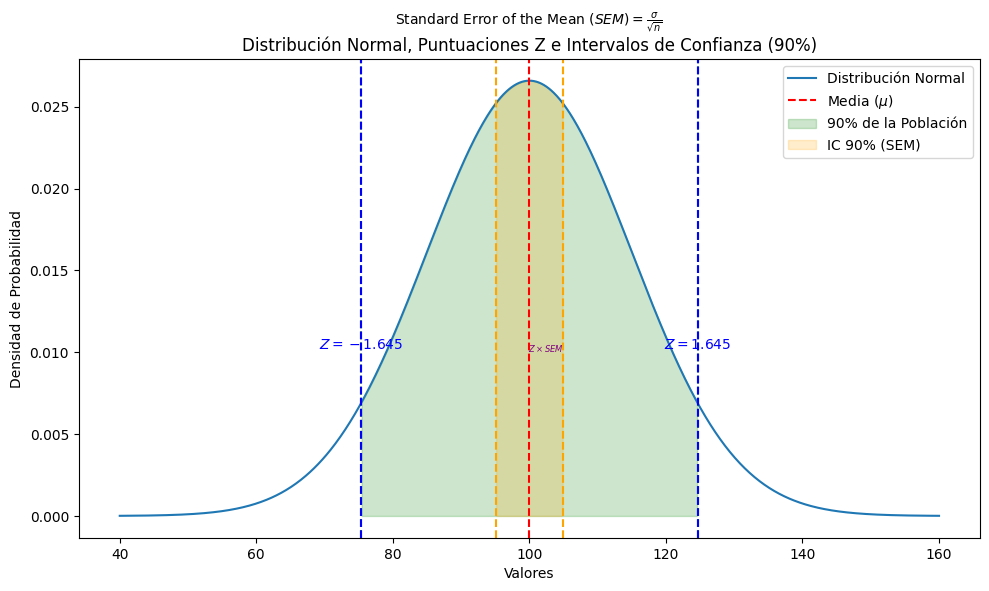

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Configuración de los parámetros de la distribución normal
mu = 100  # Media
sigma = 15  # Desviación estándar
n = 25  # Tamaño de la muestra

# Parámetro dinámico: nivel de confianza
confidence_level = 0.90  # Nivel de confianza (por ejemplo, 90%)

# Cálculo de la puntuación Z para el nivel de confianza dado
z_value = stats.norm.ppf((1 + confidence_level) / 2)

# Generación de datos para la distribución normal
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

# Cálculo del SEM
sem = sigma / np.sqrt(n)

# Cálculo del rango de la población y del intervalo de confianza
population_range = [mu - z_value * sigma, mu + z_value * sigma]
confidence_interval = [mu - z_value * sem, mu + z_value * sem]

# Creación de la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico: Distribución normal
ax.plot(x, y, label='Distribución Normal', color='#1f77b4')

# Líneas de la media
ax.axvline(mu, color='r', linestyle='--', label='Media ($\mu$)')

# Rango de la población
ax.axvline(population_range[0], color='g', linestyle='--')
ax.axvline(population_range[1], color='g', linestyle='--')
ax.fill_between(x, y, where=(x >= population_range[0]) & (x <= population_range[1]), color='g', alpha=0.2, label=f'{int(confidence_level*100)}% de la Población')

# Intervalo de confianza
ax.axvline(confidence_interval[0], color='orange', linestyle='--')
ax.axvline(confidence_interval[1], color='orange', linestyle='--')
ax.fill_between(x, y, where=(x >= confidence_interval[0]) & (x <= confidence_interval[1]), color='orange', alpha=0.2, label=f'IC {int(confidence_level*100)}% (SEM)')

# Valores de Z en desviaciones estándar
z_values = [-z_value, z_value]
for z in z_values:
    ax.axvline(mu + z * sigma, color='blue', linestyle='--')
    ax.text(mu + z * sigma, 0.01, f'$Z = {z:.3f}$', horizontalalignment='center', verticalalignment='bottom', color='blue')

# Etiquetas dentro del intervalo de confianza
#ax.text((confidence_interval[0] + mu) / 2, 0.01, f'$Z \\times SEM$', horizontalalignment='center', color='orange', fontsize=8)
ax.text((confidence_interval[1] + mu) / 2, 0.01, f'$Z \\times SEM$', horizontalalignment='center', color='purple', fontsize=6)

# Fórmula SEM en la gráfica
ax.text(mu, 0.03, r'Standard Error of the Mean $(SEM) = \frac{\sigma}{\sqrt{n}}$', horizontalalignment='center', fontsize=10)

# Configuración del gráfico
ax.set_title(f'Distribución Normal, Puntuaciones Z e Intervalos de Confianza ({int(confidence_level*100)}%)')
ax.set_xlabel('Valores')
ax.set_ylabel('Densidad de Probabilidad')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()




In [20]:
import numpy as np
from scipy.stats import norm

# Datos de ejemplo
media_muestral = 172.7815
desviacion_estandar_muestral = 4.1532
n = 50  # Tamaño de la muestra (asumiendo n > 30 para la aproximación normal)

# Nivel de confianza
nivel_confianza = 0.95

# Prueba de dos colas
# Encuentra el valor crítico z para el nivel de confianza del 95%
valor_critico = norm.ppf((1 + nivel_confianza) / 2)

# Calcula el error estándar
error_estandar = desviacion_estandar_muestral / np.sqrt(n)

# Calcula el margen de error
margen_error = valor_critico * error_estandar

# Calcula los límites del intervalo de confianza
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error

# Imprimir resultados
print(f"Valor crítico para una prueba de dos colas: {valor_critico:.4f}")
print(f"Error estándar: {error_estandar:.4f}")
print(f"Margen de error: {margen_error:.4f}")
print(f"Intervalo de confianza del {nivel_confianza * 100}%: ({limite_inferior:.4f}, {limite_superior:.4f})")


Valor crítico para una prueba de dos colas: 1.9600
Error estándar: 0.5874
Margen de error: 1.1512
Intervalo de confianza del 95.0%: (171.6303, 173.9327)


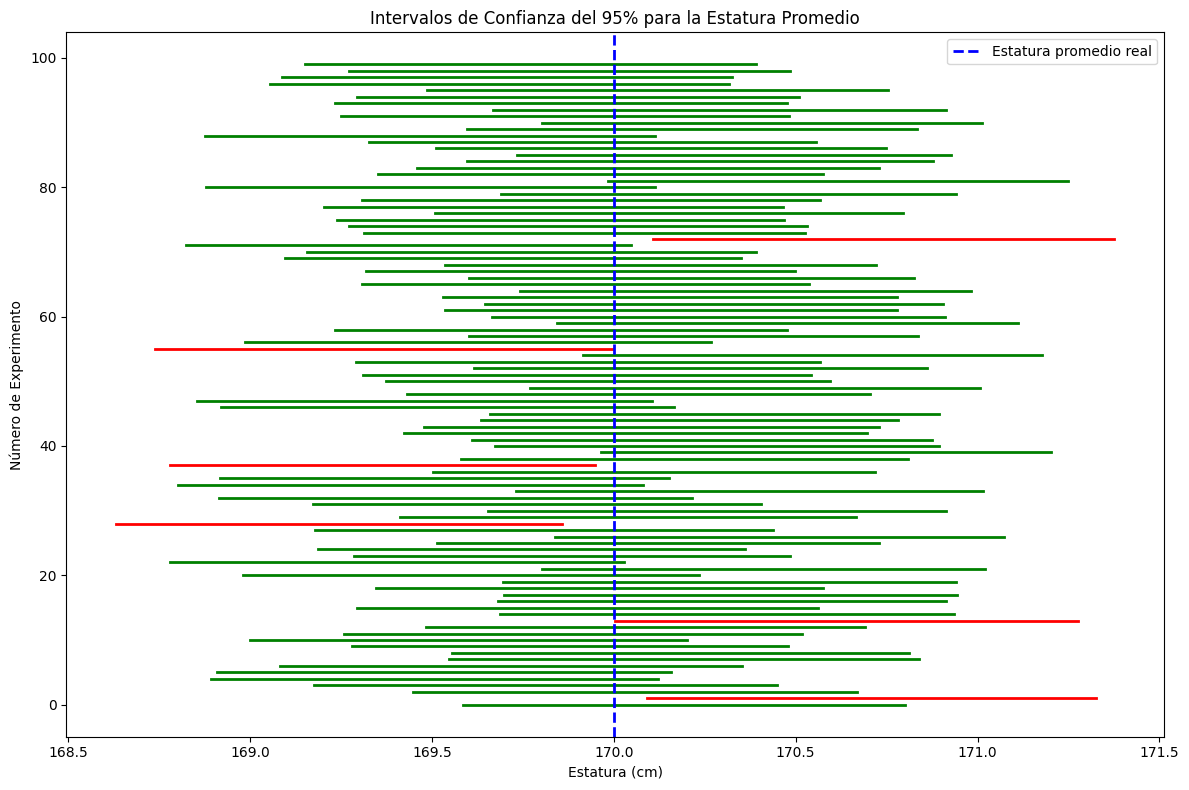

Porcentaje de intervalos que contienen la media real: 94.00%


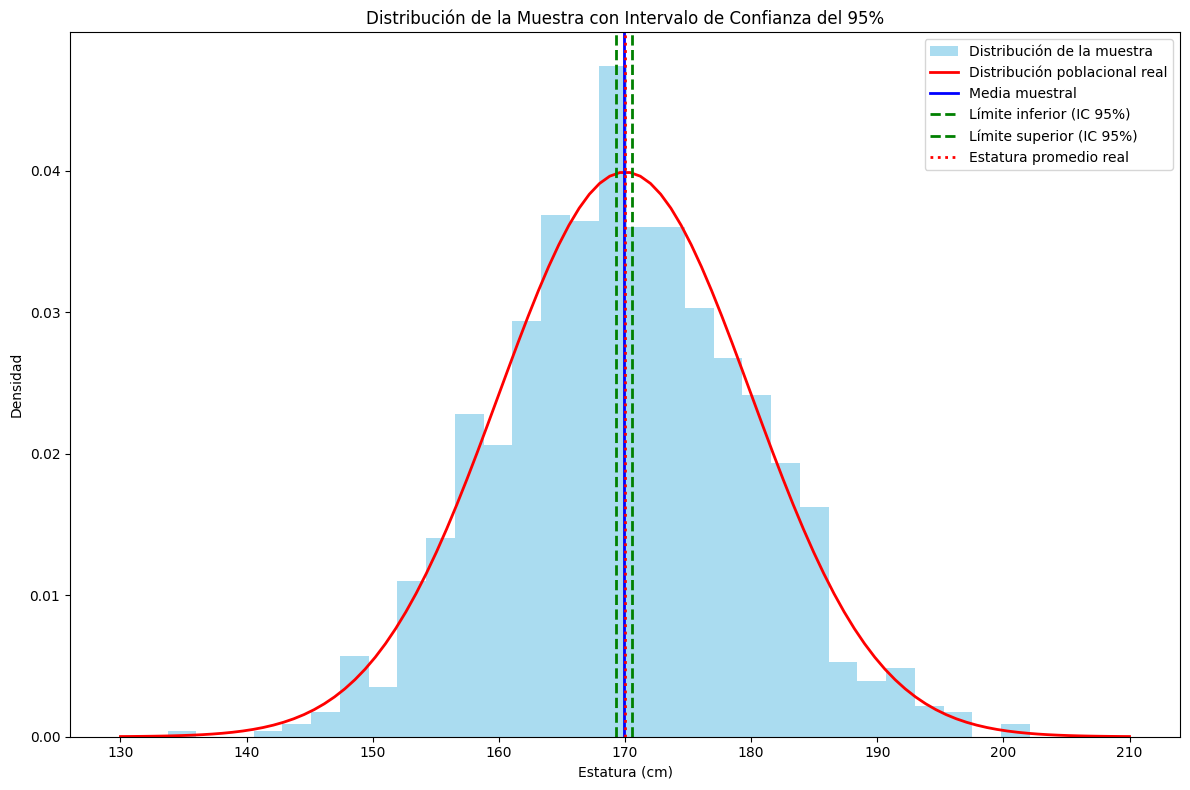

Intervalo de confianza del 95%: [169.31, 170.53]
¿El intervalo contiene la estatura real? Sí


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Establecer parámetros
np.random.seed(42)
estatura_real = 170  # Estatura promedio real de la población
desviacion_real = 10  # Desviación estándar real de la población
tamanio_muestra = 1000  # Tamaño de cada muestra
num_experimentos = 100  # Número de experimentos a realizar
nivel_confianza = 0.95  # Nivel de confianza (95%)
valor_critico = stats.norm.ppf((1 + nivel_confianza) / 2)  # Valor crítico para el nivel de confianza

# Generar muestras y calcular intervalos de confianza
intervalos = []
for _ in range(num_experimentos):
    muestra = np.random.normal(loc=estatura_real, scale=desviacion_real, size=tamanio_muestra)
    media_muestral = np.mean(muestra)
    desviacion_estandar = np.std(muestra, ddof=1)
    margen_error = valor_critico * (desviacion_estandar / np.sqrt(tamanio_muestra))
    limite_inferior = media_muestral - margen_error
    limite_superior = media_muestral + margen_error
    intervalos.append((limite_inferior, limite_superior))

# Graficar los intervalos de confianza
plt.figure(figsize=(12, 8))
for i, (limite_inferior, limite_superior) in enumerate(intervalos):
    contiene_media = limite_inferior <= estatura_real <= limite_superior
    color = 'green' if contiene_media else 'red'
    plt.plot((limite_inferior, limite_superior), (i, i), color=color, linewidth=2)
plt.axvline(estatura_real, color='blue', linestyle='--', linewidth=2, label='Estatura promedio real')
plt.title('Intervalos de Confianza del 95% para la Estatura Promedio')
plt.xlabel('Estatura (cm)')
plt.ylabel('Número de Experimento')
plt.legend()
plt.tight_layout()
plt.show()

# Calcular porcentaje de intervalos que contienen la media real
intervalos_correctos = sum(1 for inf, sup in intervalos if inf <= estatura_real <= sup)
porcentaje_correcto = (intervalos_correctos / num_experimentos) * 100
print(f"Porcentaje de intervalos que contienen la media real: {porcentaje_correcto:.2f}%")

# Visualización del intervalo de confianza en una muestra específica
muestra = np.random.normal(loc=estatura_real, scale=desviacion_real, size=tamanio_muestra)
media_muestral = np.mean(muestra)
desviacion_estandar = np.std(muestra, ddof=1)
margen_error = valor_critico * (desviacion_estandar / np.sqrt(tamanio_muestra))
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error

# Graficar la distribución de la muestra y el intervalo de confianza
plt.figure(figsize=(12, 8))
plt.hist(muestra, bins=30, density=True, alpha=0.7, color='skyblue', label='Distribución de la muestra')

# Agregar la distribución normal real
x = np.linspace(estatura_real - 4*desviacion_real, estatura_real + 4*desviacion_real, 100)
plt.plot(x, stats.norm.pdf(x, estatura_real, desviacion_real), 'r-', lw=2, label='Distribución poblacional real')

plt.axvline(media_muestral, color='blue', linestyle='-', linewidth=2, label='Media muestral')
plt.axvline(limite_inferior, color='green', linestyle='--', linewidth=2, label='Límite inferior (IC 95%)')
plt.axvline(limite_superior, color='green', linestyle='--', linewidth=2, label='Límite superior (IC 95%)')
plt.axvline(estatura_real, color='red', linestyle=':', linewidth=2, label='Estatura promedio real')
plt.title('Distribución de la Muestra con Intervalo de Confianza del 95%')
plt.xlabel('Estatura (cm)')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Intervalo de confianza del 95%: [{limite_inferior:.2f}, {limite_superior:.2f}]")
print(f"¿El intervalo contiene la estatura real? {'Sí' if limite_inferior <= estatura_real <= limite_superior else 'No'}")



## 3. Pruebas de Hipótesis

Una **prueba de hipótesis** es un procedimiento estadístico que utiliza datos muestrales para evaluar una afirmación o hipótesis sobre un parámetro poblacional.

**Formulación de hipótesis:**

* **Hipótesis nula (H0):** Es la afirmación que se está poniendo a prueba. Generalmente, establece que no hay diferencia o efecto.
* **Hipótesis alternativa (H1):** Es la afirmación que se acepta si se rechaza la hipótesis nula. Establece que sí hay una diferencia o efecto.

**Nivel de significancia (α):**

* Es la probabilidad de rechazar la hipótesis nula cuando en realidad es verdadera (error de tipo I).
* Se establece antes de realizar la prueba.
* Un valor común es α = 0.05.

**Valor p:**

* Es la probabilidad de obtener los resultados observados en la muestra, o resultados más extremos, si la hipótesis nula fuera verdadera.
* Un valor p menor que α proporciona evidencia para rechazar la hipótesis nula.

**Tipos de errores:**

* **Error de tipo I (falso positivo):** Rechazar la hipótesis nula cuando en realidad es verdadera.
* **Error de tipo II (falso negativo):** No rechazar la hipótesis nula cuando en realidad es falsa.

## 4. Distribución de Poisson: Control de una Cadena Logística

**Escenario:** Una empresa desea controlar el funcionamiento de su cadena logística monitoreando la cantidad de pedidos que llegan por hora.

**Justificación de la distribución de Poisson:**

La distribución de Poisson es adecuada para modelar eventos discretos que ocurren en un intervalo continuo de tiempo o espacio, como la llegada de pedidos, cuando se cumplen las siguientes condiciones:

1. **Eventos independientes:** La llegada de un pedido no afecta la probabilidad de llegada de otros pedidos.
2. **Tasa constante:** La tasa promedio de llegada de pedidos es constante en el tiempo.
3. **Eventos raros:** La probabilidad de que dos o más pedidos lleguen al mismo tiempo es muy baja.

**Simulación de datos con la distribución de Poisson:**

In [ ]:
import numpy as np

# Parámetros de la distribución
lambda_param = 10  # tasa promedio de pedidos por hora

# Simulación de la muestra
tamaño_muestra = 50
muestra_poisson = np.random.poisson(lambda_param, tamaño_muestra)

print("Muestra simulada para la cadena logística de distribución (Poisson):")
print(muestra_poisson)

Muestra simulada para la cadena logística de distribución (Poisson):
[11 13  8 10 12 11 10  8 12 10 18 11 10 11 13 10 10  7 10 10  9  8  9  9
 12 10  7 10  8 11 17  9  6  7  7  8 11 10  8  8  9 10 11 12  6  8 13  9
 13 14]


Los números generados en el código representan la cantidad de pedidos que se espera recibir por hora en una cadena logística de distribución, según una distribución de Poisson.

La distribución de Poisson se utiliza para modelar el número de eventos que ocurren en un intervalo de tiempo fijo, dado que estos eventos ocurren con una tasa promedio constante y de manera independiente unos de otros.

El código, `lambda_param = 10` indica que, en promedio, se esperan 10 pedidos por hora. La simulación genera 50 muestras (`tamaño_muestra = 50`), cada una representando el número de pedidos recibidos en una hora específica.

Si los datos generados fueran:

```
[13 10  9 10 13 14 11  7  8  9  2 10  6 11  5  8 19  8  7 10 11 14 10  7  9 14  2  5 10 16  5 12  7  9  4 16 10]
```

El primer número (13) indica que en la primera hora se recibieron 13 pedidos, el segundo número (10) indica que en la segunda hora se recibieron 10 pedidos, y así sucesivamente para las 50 horas simuladas.


### Intervalos de Confianza (Poisson): Explicación Detallada y Ejemplos

Un intervalo de confianza es un rango de valores que probablemente contiene un parámetro poblacional desconocido. En lugar de estimar el parámetro con un solo valor (estimación puntual), proporcionamos un intervalo de valores plausibles.

#### ¿Para qué sirven los intervalos de confianza?

1. **Estimación de parámetros**: Proporcionan un rango de valores probables para un parámetro poblacional.
2. **Medición de precisión**: Indican la precisión de nuestra estimación.
3. **Toma de decisiones**: Ayudan en la toma de decisiones al proporcionar un rango de valores probables.
4. **Comparaciones**: Permiten comparar diferentes grupos o poblaciones.

#### Relación con la Distribución de Poisson

Para la distribución de Poisson, el intervalo de confianza se calcula para el parámetro λ (lambda), que representa la tasa media de ocurrencia de eventos.

**Fórmula aproximada**:
$ \hat{\lambda} \pm z \cdot \sqrt{\frac{\hat{\lambda}}{n}} $

Donde:
- $ \hat{\lambda} $ es la media muestral.
- $ z $ es el valor crítico de la distribución normal (por ejemplo, 1.96 para un 95% de confianza).
- $ n $ es el tamaño de la muestra.

#Ejemplo Práctico (hipotético): Tasa de pedidos por hora en una cadena logística

Supongamos que queremos estimar la media poblacional del número de pedidos por hora en una cadena logística. A partir de una muestra de 50 horas, obtenemos los siguientes datos (número de pedidos por hora):

```
[13 10  9 10 13 14 11  7  8  9  2 10  6 11  5  8 19  8  7 10 11 14 10  7  9 14  2  5 10 16  5 12  7  9  4 16 10]
```

Primero, calculamos la media muestral ($\hat{\lambda}$) de los datos generados:

$$ \hat{\lambda} = \frac{13 + 10 + 9 + \cdots + 10}{50} $$

Suponiendo que la media muestral resultante es aproximadamente 10 (esto es un valor hipotético para simplificar el cálculo):

Para calcular el intervalo de confianza del 95%, utilizamos el valor crítico de 1.96 (que corresponde a un nivel de confianza del 95%) y aplicamos la fórmula:

$$ \hat{\lambda} \pm z \cdot \sqrt{\frac{\hat{\lambda}}{n}} $$
$$ 10 \pm 1.96 \cdot \sqrt{\frac{10}{50}} $$

Calculamos el error estándar:

$$ \sqrt{\frac{10}{50}} = \sqrt{0.2} \approx 0.447 $$

Luego multiplicamos por el valor crítico:

$$ 1.96 \cdot 0.447 \approx 0.876 $$

Finalmente, obtenemos el intervalo de confianza:

$$ 10 \pm 0.876 $$

Esto nos da un intervalo de confianza de:

$$ (9.124, 10.876) $$

Por lo tanto, podemos decir que, con un 95% de confianza, la media poblacional del número de pedidos por hora está entre 9.124 y 10.876. Este intervalo proporciona una estimación más informada y precisa que una simple media puntual, permitiéndonos tener una mejor comprensión de la variabilidad y confiabilidad de los datos en la cadena logística.


#Decisión basada solo en intuición o estimación puntual:

Imaginemos que un gerente de logística decide planificar sus recursos basándose únicamente en la estimación puntual de 10 pedidos por hora, sin considerar la variabilidad inherente a los datos.

1. Escenario optimista: Si la demanda real se mantiene cercana a los 10 pedidos por hora, el gerente podría sentirse satisfecho con su decisión intuitiva. Sin embargo, esta aparente precisión podría ser más producto de la suerte que de una planificación adecuada.

2. Escenario pesimista: Si la demanda real fluctúa significativamente, por ejemplo, alcanzando picos de 12-13 pedidos por hora, el gerente se enfrentaría a:
   - Escasez de personal para manejar el aumento de pedidos
   - Posibles retrasos en las entregas y insatisfacción de los clientes
   - Estrés adicional para los empleados y posible disminución de la calidad del servicio
   - Costos adicionales por horas extras o contrataciones de emergencia

3. Consecuencias a largo plazo:
   - Pérdida de confianza en la capacidad de planificación del gerente
   - Posible pérdida de clientes debido a un servicio inconsistente
   - Dificultad para optimizar costos y recursos a largo plazo

Decisión basada en intervalos de confianza:

Ahora, consideremos cómo cambia la situación cuando el gerente utiliza el intervalo de confianza de 9.124 a 10.876 pedidos por hora (con 95% de confianza):

1. Planificación más robusta: El gerente puede desarrollar planes escalonados para manejar diferentes niveles de demanda dentro del intervalo.

2. Optimización de recursos:
   - Personal: Puede establecer un equipo base para manejar el límite inferior del intervalo (9.124 pedidos/hora) y tener personal adicional en espera o con horarios flexibles para cubrir aumentos hasta el límite superior (10.876 pedidos/hora).
   - Equipamiento: Puede asegurarse de tener capacidad suficiente para manejar el límite superior del intervalo, evitando cuellos de botella.

3. Gestión de expectativas: Puede comunicar a los stakeholders (jefes, clientes, empleados) que la demanda puede variar dentro de este rango, preparándolos para posibles fluctuaciones.

4. Análisis de riesgos: Puede evaluar el impacto financiero y operativo de operar en diferentes puntos del intervalo, desarrollando estrategias de mitigación para escenarios extremos.

5. Mejora continua: Al monitorear dónde cae la demanda real dentro del intervalo a lo largo del tiempo, puede refinar sus modelos y estrechar el intervalo de confianza, mejorando la precisión de futuras predicciones.

6. Toma de decisiones estratégicas:
   - Si la demanda consistentemente se acerca al límite superior, podría justificar inversiones en expansión.
   - Si tiende al límite inferior, podría enfocarse en estrategias de crecimiento o diversificación.

7. Consecuencias a largo plazo:
   - Mayor confianza en la capacidad de planificación del gerente
   - Servicio más consistente y satisfacción del cliente
   - Optimización de costos y recursos a largo plazo
   - Capacidad para adaptarse rápidamente a cambios en la demanda

Mientras que la decisión basada en intuición o en una estimación puntual puede llevar a problemas significativos y pérdida de oportunidades, el uso de intervalos de confianza permite una planificación más flexible, robusta y estratégica. Esto no solo mitiga riesgos, sino que también posiciona a la empresa para capitalizar oportunidades y mantener un alto nivel de servicio incluso frente a la variabilidad inherente en los datos.

#### Cálculo del Intervalo de Confianza

In [ ]:
import scipy.stats as stats

def intervalo_confianza_poisson(muestra, confianza=0.95):
    media_muestral = np.mean(muestra)
    n = len(muestra)
    error_estandar = np.sqrt(media_muestral / n)
    z = stats.norm.ppf((1 + confianza) / 2)
    margen_error = z * error_estandar
    return media_muestral - margen_error, media_muestral + margen_error

# Calcular el intervalo de confianza para nuestra muestra
ic_poisson = intervalo_confianza_poisson(muestra_poisson)
print(f"Intervalo de confianza del 95% para la tasa de pedidos: {ic_poisson}")

Intervalo de confianza del 95% para la tasa de pedidos: (8.492896400842458, 10.187103599157542)


### Pruebas de Hipótesis: Explicación Detallada y Ejemplos

#### ¿Qué es una prueba de hipótesis?

Una prueba de hipótesis es un procedimiento estadístico utilizado para tomar decisiones o inferencias sobre un parámetro poblacional basándose en una muestra de datos. La prueba evalúa si la evidencia de la muestra es suficiente para rechazar una hipótesis nula predefinida en favor de una hipótesis alternativa.

#### Contexto Actual: Cadena Logística de Pedidos

En el contexto de la cadena logística de pedidos, podríamos estar interesados en evaluar si la tasa media de pedidos por hora ha cambiado debido a un nuevo sistema de gestión implementado. Supongamos que antes de la implementación, la tasa promedio de pedidos por hora era de 10.

#### Planteamiento de la Prueba de Hipótesis

El planteamiento de una prueba de hipótesis sigue estos pasos:

1. **Definición de las hipótesis**:
   - **Hipótesis nula ($H_0$)**: Es la afirmación que se busca poner a prueba. Generalmente, se plantea como una afirmación de igualdad. En este caso, $H_0$: La tasa media de pedidos por hora es 10.
   - **Hipótesis alternativa ($H_1$)**: Es la afirmación que se considera verdadera si se rechaza la hipótesis nula. Puede ser una afirmación de diferencia o desigualdad. En este caso, $H_1$: La tasa media de pedidos por hora no es 10.

2. **Selección del nivel de significancia ($\alpha$)**: Es la probabilidad de rechazar la hipótesis nula cuando es verdadera. Un valor comúnmente utilizado es $\alpha = 0.05$ (5%).

3. **Recolección de datos**: Se obtiene una muestra representativa de los datos. En nuestro ejemplo, supongamos que recolectamos datos de 50 horas de pedidos después de implementar el nuevo sistema.

4. **Cálculo del estadístico de prueba**: Utilizando la muestra, se calcula un valor que ayudará a determinar si se rechaza o no la hipótesis nula. En el caso de una prueba de hipótesis para la media, este estadístico puede ser una $z$ o $t$.

5. **Determinación del valor p**: El valor p es la probabilidad de observar un resultado tan extremo como el de la muestra, bajo la suposición de que la hipótesis nula es verdadera. Si el valor p es menor que $\alpha$, se rechaza $H_0$.

6. **Decisión**: Basado en el valor p y el nivel de significancia, se decide si se rechaza o no la hipótesis nula.

#### Motivación para Generar una Prueba de Hipótesis

Una prueba de hipótesis se genera cuando existe una necesidad de tomar decisiones informadas sobre un parámetro poblacional basado en datos muestrales. En el contexto de la cadena logística, esto podría ser motivado por varios factores:
- **Evaluar cambios**: Verificar si la implementación de un nuevo sistema de gestión ha alterado significativamente la tasa de pedidos por hora.
- **Validar suposiciones**: Comprobar si las suposiciones operativas actuales (por ejemplo, una tasa de pedidos constante) siguen siendo válidas.
- **Tomar decisiones estratégicas**: Basar decisiones operativas y estratégicas en evidencia estadística sólida, en lugar de intuiciones o suposiciones no verificadas.

#### Beneficios de Realizar una Prueba de Hipótesis

Realizar una prueba de hipótesis proporciona varios beneficios importantes:
- **Rigor estadístico**: Ofrece un marco formal y riguroso para evaluar afirmaciones sobre un parámetro poblacional.
- **Reducción de riesgos**: Ayuda a mitigar el riesgo de tomar decisiones basadas en suposiciones incorrectas o en variaciones aleatorias en los datos.
- **Justificación basada en datos**: Permite justificar decisiones estratégicas y operativas con evidencia cuantitativa, aumentando la credibilidad y confiabilidad de las decisiones tomadas.
- **Identificación de cambios significativos**: Facilita la detección de cambios significativos en los procesos, permitiendo una respuesta oportuna y adecuada a las nuevas condiciones operativas.

Entonces, las pruebas de hipótesis son herramientas fundamentales en el análisis de datos, permitiendo a las organizaciones tomar decisiones informadas y basadas en evidencia, mejorando así la eficiencia y efectividad de sus operaciones.

#Profundicemos en el punto 4

### Pruebas de Hipótesis: Cálculo del Estadístico de Prueba

#### Cálculo del Estadístico de Prueba

4. **Cálculo del estadístico de prueba**: Utilizando la muestra, se calcula un valor que ayudará a determinar si se rechaza o no la hipótesis nula. En el caso de una prueba de hipótesis para la media, este estadístico puede ser una $z$ o $t$.

#### ¿Qué es el estadístico $z$?

El estadístico $z$ se utiliza cuando la muestra es grande (n > 30) y se conoce la desviación estándar de la población ($\sigma$). El estadístico $z$ se calcula utilizando la siguiente fórmula:

$$ z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}} $$

Donde:
- $\bar{x}$ es la media muestral.
- $\mu$ es la media poblacional bajo la hipótesis nula.
- $\sigma$ es la desviación estándar de la población.
- $n$ es el tamaño de la muestra.

El valor $z$ nos indica cuántas desviaciones estándar está la media muestral ($\bar{x}$) de la media poblacional supuesta ($\mu$). Si $|z|$ es grande, esto sugiere que la media muestral está lejos de lo que se esperaría si la hipótesis nula fuera verdadera.

#### ¿Qué es el estadístico $t$?

El estadístico $t$ se utiliza cuando la muestra es pequeña (n ≤ 30) o cuando la desviación estándar de la población ($\sigma$) es desconocida. En este caso, utilizamos la desviación estándar muestral ($s$) en lugar de $\sigma$. El estadístico $t$ se calcula utilizando la siguiente fórmula:

$$ t = \frac{\bar{x} - \mu}{s / \sqrt{n}} $$

Donde:
- $\bar{x}$ es la media muestral.
- $\mu$ es la media poblacional bajo la hipótesis nula.
- $s$ es la desviación estándar muestral.
- $n$ es el tamaño de la muestra.

El valor $t$ es similar al valor $z$ en su interpretación, pero toma en cuenta la variabilidad adicional debida al uso de $s$ en lugar de $\sigma$. Por lo tanto, las distribuciones $t$ tienen colas más gruesas que la distribución normal, lo que refleja la mayor incertidumbre.

#### ¿Cuándo se elige $z$ o $t$?

- Elegir $z$: Se elige el estadístico $z$ cuando la muestra es grande y la desviación estándar de la población es conocida. En estos casos, la distribución de la media muestral se aproxima a una distribución normal.
- Elegir $t$: Se elige el estadístico $t$ cuando la muestra es pequeña o la desviación estándar de la población es desconocida. La distribución $t$ se ajusta mejor a muestras pequeñas y refleja la mayor incertidumbre cuando se estima la desviación estándar a partir de la muestra.

### Interpretación:
- Un valor $z$ de 1 significa que la media muestral está a una desviación estándar de la media poblacional supuesta.
- Un valor $z$ de 2 significa que está a dos desviaciones estándar, y así sucesivamente.
- Cuanto mayor sea $|z|$, más evidencia tenemos contra la hipótesis nula.


****

### De $\alpha$ al Valor Crítico

Para comprender cómo se establece la decisión de rechazar o no una hipótesis nula en una prueba de hipótesis, es fundamental entender los conceptos de $\alpha$ (alfa) y el valor crítico.

### $\alpha$ (alfa):
- Es el **nivel de significancia**, que representa la probabilidad de cometer un error Tipo I, es decir, rechazar la hipótesis nula cuando en realidad es verdadera.
- Comúnmente, se utiliza α = 0.05 o α = 0.01. Un α más pequeño indica una menor probabilidad de cometer un error Tipo I, pero también puede hacer que la prueba sea menos sensible.
- α determina qué tan estrictos somos al decidir rechazar la hipótesis nula. Un nivel de significancia más bajo significa que necesitamos evidencia más fuerte para rechazar la hipótesis nula.

### Valor Crítico:
- Es el punto de corte en la distribución de la estadística de prueba que separa la **región de rechazo** de la **región de no rechazo**.
- Se determina utilizando α y la distribución apropiada (z para distribuciones normales y t para distribuciones t de Student).

### Cómo se Obtiene el Valor Crítico:

1. **Para una prueba de dos colas con α = 0.05**:
   - Dividimos α entre 2 porque hay dos colas: 0.05/2 = 0.025.
   - Buscamos en la tabla z el valor que deja un área de 0.025 en cada cola: z ≈ ±1.96.

2. **Para una prueba de una cola con α = 0.05**:
   - Buscamos en la tabla z el valor que deja un área de 0.05 en una cola: z ≈ 1.645 (para cola derecha).


### Prueba de Hipótesis

#### Concepto Clave

Para una prueba de hipótesis sobre la media de una distribución de Poisson, podemos usar una aproximación normal si la media es suficientemente grande.

**Fórmula del Estadístico de Prueba**:
$ Z = \frac{\bar{X} - \lambda_0}{\sqrt{\frac{\lambda_0}{n}}} $

Donde:
- $ \bar{X} $ es la media muestral.
- $ \lambda_0 $ es el valor hipotético de la media.
- $ n $ es el tamaño de la muestra.

#### Ejemplo Práctico

import scipy.stats as stats
# Formulación de Hipótesis para la Prueba de Poisson en Cadena Logística

## Contexto

Recordemos que estamos analizando una cadena logística de distribución, donde la tasa de pedidos por hora se modela mediante una distribución de Poisson. La empresa cree que la tasa media de pedidos es de 9 por hora, y queremos verificar esta afirmación estadísticamente.

## Formulación de Hipótesis

Para este escenario, las hipótesis se formulan de la siguiente manera:

1. **Hipótesis Nula (H0)**:
   λ = 9

   En palabras: "La tasa media de pedidos por hora en la cadena logística es igual a 9 pedidos por hora."

2. **Hipótesis Alternativa (H1)**:
   λ ≠ 9

   En palabras: "La tasa media de pedidos por hora en la cadena logística es diferente de 9 pedidos por hora."

## Explicación

- La hipótesis nula (H0) representa la afirmación que estamos poniendo a prueba. En este caso, es la creencia actual de la empresa de que la tasa media es de 9 pedidos por hora.

- La hipótesis alternativa (H1) representa la afirmación que aceptaremos si encontramos suficiente evidencia para rechazar la hipótesis nula. En este caso, sugiere que la tasa media es significativamente diferente de 9 pedidos por hora.

- Nota: Esta es una prueba de dos colas porque estamos interesados en detectar diferencias en ambas direcciones (mayor o menor que 9).

## Implicaciones

1. Si no rechazamos H0, concluimos que no hay evidencia suficiente para afirmar que la tasa media de pedidos sea diferente de 9 por hora.

2. Si hubiéramos rechazado H0, concluiríamos que hay evidencia estadística significativa de que la tasa media de pedidos es diferente de 9 por hora, aunque no sabríamos específicamente si es mayor o menor sin un análisis adicional.



In [ ]:
import scipy.stats as stats

def prueba_hipotesis_poisson(muestra, lambda_0, alpha=0.05):
    media_muestral = np.mean(muestra)
    n = len(muestra)
    z = (media_muestral - lambda_0) / np.sqrt(lambda_0 / n)
    p_valor = 2 * (1 - stats.norm.cdf(abs(z)))
    return p_valor < alpha, p_valor

# Parámetros de la prueba de hipótesis
lambda_0 = 9  # Valor hipotético de lambda

# Realizar la prueba de hipótesis
rechazo, p_valor = prueba_hipotesis_poisson(muestra_poisson, lambda_0)
print(f"Resultado de la prueba de hipótesis (H0: λ = {lambda_0}):")
print(f"Se rechaza H0: {rechazo}, p-valor: {p_valor}")

Resultado de la prueba de hipótesis (H0: λ = 9):
Se rechaza H0: True, p-valor: 0.010909498364269243


# Explicación

## La Función `prueba_hipotesis_poisson`

Vamos a desglosar la función y explicar cada parte:

```python
def prueba_hipotesis_poisson(muestra, lambda_0, alpha=0.05):
    media_muestral = np.mean(muestra)
    n = len(muestra)
    z = (media_muestral - lambda_0) / np.sqrt(lambda_0 / n)
    p_valor = 2 * (1 - stats.norm.cdf(abs(z)))
    return p_valor < alpha, p_valor
```

### Parámetros de entrada

1. `muestra`: Es nuestra lista de observaciones, en este caso, el número de pedidos por hora para varios períodos.
2. `lambda_0`: Es el valor hipotético de la tasa media de pedidos por hora según nuestra hipótesis nula.
3. `alpha`: Es nuestro nivel de significancia, por defecto 0.05 (5%).

### Cálculos internos

#### 1. Media muestral
```python
media_muestral = np.mean(muestra)
```
Calculamos la media de nuestra muestra. En el contexto de pedidos, esto sería la tasa promedio observada de pedidos por hora en nuestra muestra.

#### 2. Tamaño de la muestra
```python
n = len(muestra)
```
Contamos cuántas observaciones tenemos. Esto podría ser, por ejemplo, el número de horas que hemos estado registrando pedidos.

#### 3. Estadístico Z
```python
z = (media_muestral - lambda_0) / np.sqrt(lambda_0 / n)
```
Este es el corazón de nuestra prueba. Recordemos que el valor z nos indica cuántas desviaciones estándar está nuestra media muestral del valor hipotético `lambda_0`.

- `(media_muestral - lambda_0)` es la diferencia entre lo que observamos y lo que esperaríamos bajo la hipótesis nula.
- `np.sqrt(lambda_0 / n)` es el error estándar. En una distribución Poisson, la varianza es igual a la media, por lo que usamos `lambda_0` en lugar de una varianza estimada.

#### 4. Cálculo del p-valor
```python
p_valor = 2 * (1 - stats.norm.cdf(abs(z)))
```
Aquí calculamos el p-valor para una prueba de dos colas. Recordemos que el p-valor es la probabilidad de obtener un resultado tan extremo como el observado, asumiendo que la hipótesis nula es verdadera.

- `stats.norm.cdf(abs(z))` nos da la probabilidad acumulada hasta `|z|` en una distribución normal estándar.
- `1 - stats.norm.cdf(abs(z))` nos da la probabilidad en una cola.
- Multiplicamos por 2 para obtener la probabilidad en ambas colas (prueba de dos colas).

### Decisión y retorno

```python
return p_valor < alpha, p_valor
```
La función retorna dos valores:

1. Un booleano que indica si rechazamos (`True`) o no rechazamos (`False`) la hipótesis nula.
2. El p-valor calculado.

## Conexión con Conceptos Previos

1. **Hipótesis nula y alternativa**:
   - H₀: La tasa real de pedidos es igual a `lambda_0`
   - H₁: La tasa real de pedidos es diferente de `lambda_0`

2. **Nivel de significancia (α)**:
   Establecemos α = 0.05 por defecto, lo que significa que estamos dispuestos a tener un 5% de probabilidad de rechazar la hipótesis nula cuando es verdadera.

3. **Estadístico Z**:
   Similar a lo que discutimos antes, este valor nos dice cuán lejos está nuestra media muestral de `lambda_0` en términos de desviaciones estándar.

4. **P-valor vs. α**:
   Comparamos el p-valor con α para tomar nuestra decisión. Si p-valor < α, rechazamos la hipótesis nula.

5. **Interpretación**:
   - Si rechazamos H₀, concluimos que hay evidencia estadística suficiente para decir que la tasa real de pedidos es significativamente diferente de `lambda_0`.
   - Si no rechazamos H₀, no tenemos evidencia suficiente para decir que la tasa real es diferente de `lambda_0`.


### Interpretación si se Rechaza la Hipótesis Nula

En el contexto de la función `prueba_hipotesis_poisson`, interpretamos los resultados de la prueba de hipótesis cuando se rechaza la hipótesis nula.

#### Interpretación de los Resultados

1. **Se rechaza la hipótesis nula (H0)**:
   - El resultado "Se rechaza H0: True" indica que tenemos suficiente evidencia estadística para rechazar la hipótesis nula. Esto significa que podemos concluir que la tasa media de pedidos por hora en la cadena logística es significativamente diferente de 9 pedidos por hora.

2. **P-valor**:
   - El p-valor de 0.0109 es menor que el nivel de significancia típico de 0.05. Este valor nos dice que, si la hipótesis nula fuera cierta (es decir, si la verdadera tasa media de pedidos fuera realmente 9 por hora), la probabilidad de observar una diferencia tan grande o más grande que la que observamos en nuestra muestra sería de aproximadamente 1.09%.

3. **Interpretación práctica**:
   - Hay evidencia suficiente para sugerir que la tasa real de pedidos es diferente de 9 por hora.
   - Las diferencias observadas en la muestra son significativas y no pueden atribuirse únicamente a la variabilidad aleatoria normal en el proceso de pedidos.

### Implicaciones para la Cadena Logística

1. **Reevaluación del modelo actual**:
   - La empresa debe reconsiderar su estimación de 9 pedidos por hora como la tasa media de pedidos, ya que la evidencia sugiere que la tasa real es diferente.

2. **Planificación de recursos**:
   - Los planes de capacidad y recursos basados en una tasa de 9 pedidos por hora pueden no ser adecuados y pueden necesitar ajustes significativos para reflejar la nueva tasa estimada.

3. **Monitoreo continuo**:
   - Es crucial continuar monitoreando la tasa de pedidos para confirmar esta diferencia y ajustar las estrategias operativas en consecuencia.

4. **Investigación adicional**:
   - La empresa debería investigar otros factores que podrían estar afectando la tasa de pedidos, como cambios en la demanda del mercado, modificaciones en los procesos internos o la implementación de nuevas tecnologías.

***
***
## Interpretación sí no se rechaza

1. **No se rechaza la hipótesis nula (H0)**:
   El resultado "Se rechaza H0: False" indica que no tenemos suficiente evidencia estadística para rechazar la hipótesis nula. Esto significa que no podemos concluir que la tasa media de pedidos por hora en la cadena logística sea significativamente diferente de 9 pedidos por hora.

2. **P-valor**:
   El p-valor de 0.4229 es considerablemente mayor que el nivel de significancia típico de 0.05. Este valor nos dice que, si la hipótesis nula fuera cierta (es decir, si la verdadera tasa media de pedidos fuera realmente 9 por hora), la probabilidad de observar una diferencia tan grande o más grande que la que observamos en nuestra muestra sería de aproximadamente 42.29%.

3. **Interpretación práctica**:
   - No hay evidencia suficiente para sugerir que la tasa real de pedidos sea diferente de 9 por hora.
   - Las diferencias observadas en la muestra son probablemente debido a la variabilidad aleatoria normal en el proceso de pedidos, más que a una diferencia real en la tasa media.

## Implicaciones para la cadena logística

1. **Validación del modelo actual**:
   La empresa puede seguir confiando en su estimación de 9 pedidos por hora como una representación razonable de la tasa real de pedidos.

2. **Planificación de recursos**:
   Los planes de capacidad y recursos basados en una tasa de 9 pedidos por hora siguen siendo válidos y no necesitan ajustes significativos basados en esta evidencia.

3. **Monitoreo continuo**:
   Aunque no se encontró una diferencia significativa, es importante continuar monitoreando la tasa de pedidos. Cambios futuros podrían llevar a resultados diferentes.

4. **Consideración de otros factores**:
   Si la empresa sospecha que hay cambios en la tasa de pedidos basados en otras observaciones o datos, podría ser útil investigar otros factores que podrían estar afectando el proceso pero que no son capturados por esta prueba estadística.

## Conclusión de la sección

Este resultado sugiere que la tasa media de pedidos por hora en la cadena logística es consistente con la hipótesis de 9 pedidos por hora. La empresa puede continuar operando bajo este supuesto con un grado razonable de confianza. Sin embargo, es importante recordar que "no rechazar" la hipótesis nula no es lo mismo que "probar" que la hipótesis nula es verdadera. Simplemente significa que no tenemos suficiente evidencia para concluir que es falsa.

Esta interpretación proporciona una base sólida para la toma de decisiones en la gestión de la cadena logística, permitiendo a la empresa mantener sus estrategias actuales mientras permanece alerta a posibles cambios futuros en la tasa de pedidos.

In [ ]:
#*****

# Inferencia Estadística para Sistemas de Control y Medición (Binomial)

En esta sección, abordaremos el escenario del control estadístico del funcionamiento de un centro de producción utilizando la distribución binomial. Exploraremos cómo calcular intervalos de confianza y realizar pruebas de hipótesis.

## 2. Control estadístico del funcionamiento de un centro de producción

### Distribución: Binomial

#### Justificación:
La distribución binomial es adecuada para modelar procesos de calidad en un centro de producción porque:
1. Cada pieza producida tiene dos posibles resultados: defectuosa o no defectuosa.
2. Hay un número fijo de ensayos (piezas producidas).
3. La probabilidad de producir una pieza defectuosa se mantiene constante.
4. Los resultados de cada pieza son independientes entre sí.

#### Simulación de Datos

Primero, simulamos los datos usando la distribución binomial.

In [ ]:
import numpy as np

# Parámetros de la distribución
n = 100  # número de piezas producidas
p = 0.05  # probabilidad de producir una pieza defectuosa

# Simulación de la muestra
tamaño_muestra = 50
muestra_binomial = np.random.binomial(n, p, tamaño_muestra)

print("Muestra simulada para el centro de producción (Binomial):")
print(muestra_binomial)

Muestra simulada para el centro de producción (Binomial):
[5 8 5 7 4 4 5 5 5 4 4 3 5 2 5 4 4 7 4 4 4 3 7 9 5 5 8 3 5 4 4 3 5 7 7 1 3
 6 4 3 6 7 5 7 4 2 5 5 5 5]


### Intervalos de Confianza: Explicación Detallada y Ejemplos

#### ¿Qué son los intervalos de confianza?

Un intervalo de confianza es un rango de valores que probablemente contiene un parámetro poblacional desconocido. En lugar de estimar el parámetro con un solo valor (estimación puntual), proporcionamos un intervalo de valores plausibles.

#### ¿Para qué sirven los intervalos de confianza?

1. **Estimación de parámetros**: Proporcionan un rango de valores probables para un parámetro poblacional.
2. **Medición de precisión**: Indican la precisión de nuestra estimación.
3. **Toma de decisiones**: Ayudan en la toma de decisiones al proporcionar un rango de valores probables.
4. **Comparaciones**: Permiten comparar diferentes grupos o poblaciones.

#### Relación con la Distribución Binomial

Para estimar la proporción de piezas defectuosas, utilizamos el intervalo de confianza para una proporción.

**Fórmula**:
$ IC = \left( \hat{p} - z \cdot \sqrt{\frac{\hat{p} (1 - \hat{p})}{n}}, \hat{p} + z \cdot \sqrt{\frac{\hat{p} (1 - \hat{p})}{n}} \right) $

Donde:
- $ \hat{p} $ es la proporción muestral.
- $ z $ es el valor crítico de la distribución normal para el nivel de confianza deseado.
- $ n $ es el tamaño de la muestra.

#### Cálculo del Intervalo de Confianza


In [ ]:
import scipy.stats as stats

def intervalo_confianza_binomial(muestra, n, confianza=0.95):
    p_estimado = np.mean(muestra) / n
    z = stats.norm.ppf((1 + confianza) / 2)
    margen_error = z * np.sqrt((p_estimado * (1 - p_estimado)) / len(muestra))
    return (p_estimado - margen_error, p_estimado + margen_error)

# Calcular el intervalo de confianza para nuestra muestra
ic_binomial = intervalo_confianza_binomial(muestra_binomial, n)
print(f"Intervalo de confianza del 95% para la proporción de piezas defectuosas: {ic_binomial}")

Intervalo de confianza del 95% para la proporción de piezas defectuosas: (-0.011168962323232057, 0.10756896232323206)


**Interpretación del Intervalo de Confianza**:

1. **Significado**:
   - **Intervalo de Confianza**: Este intervalo indica que, con un 95% de confianza, la proporción verdadera de piezas defectuosas en el centro de producción se encuentra entre -0.0112 y 0.1076.
   
2. **Proporciones Negativas**:
   - En un contexto real, una proporción negativa no tiene sentido porque las proporciones deben estar entre 0 y 1. Esto puede ocurrir debido a la aproximación normal utilizada en el cálculo del intervalo de confianza. En la práctica, simplemente se ajusta el límite inferior a 0 si se obtiene un valor negativo.
   - Ajustado: El intervalo de confianza sería (0, 0.1076).

3. **Precisión y Decisiones**:
   - **Precisión**: El intervalo de confianza proporciona una idea sobre la precisión de la estimación de la proporción de piezas defectuosas. Un intervalo más estrecho indica una estimación más precisa.
   - **Toma de Decisiones**: Si la proporción de piezas defectuosas esperada es muy baja, un intervalo de confianza que incluye valores bajos puede ser aceptable. Sin embargo, si el límite superior del intervalo de confianza es demasiado alto, podría ser un indicador de que se necesita mejorar el control de calidad.

### Explicación Intuitiva

El intervalo de confianza nos ayuda a entender la variabilidad en nuestras estimaciones y proporciona un rango dentro del cual esperamos que se encuentre el verdadero valor de la proporción de piezas defectuosas. En este caso, el intervalo de confianza nos dice que, basándonos en nuestra muestra, estamos 95% seguros de que la proporción verdadera de piezas defectuosas está entre 0 y aproximadamente 10.76%.

### Consideraciones Prácticas

1. **Tamaño de la Muestra**: El tamaño de la muestra influye en el margen de error. Muestras más grandes tienden a proporcionar estimaciones más precisas (intervalos de confianza más estrechos).
2. **Mejora Continua**: Si el intervalo de confianza sugiere que la proporción de defectos podría ser inaceptablemente alta, se deben tomar medidas para mejorar el proceso de producción y reducir la tasa de defectos.

### Prueba de Hipótesis

#### Concepto Clave

Para probar si la proporción de piezas defectuosas es diferente de un valor específico, utilizamos el estadístico $ Z $ para proporciones.

**Fórmula del Estadístico de Prueba**:
$ Z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0 (1 - p_0)}{n}}} $

Donde:
- $ \hat{p} $ es la proporción muestral.
- $ p_0 $ es el valor hipotético de la proporción.
- $ n $ es el tamaño de la muestra.

#### Ejemplo Práctico


In [ ]:
def prueba_hipotesis_binomial(muestra, n, p_0, alpha=0.05):
    p_estimado = np.mean(muestra) / n
    se = np.sqrt(p_0 * (1 - p_0) / len(muestra))
    z = (p_estimado - p_0) / se
    p_valor = 2 * (1 - stats.norm.cdf(abs(z)))
    return p_valor < alpha, p_valor

# Parámetros de la prueba de hipótesis
p_0 = 0.06  # Valor hipotético de la proporción de piezas defectuosas

# Realizar la prueba de hipótesis
rechazo, p_valor = prueba_hipotesis_binomial(muestra_binomial, n, p_0)
print(f"Resultado de la prueba de hipótesis (H0: p = {p_0}):")
print(f"Se rechaza H0: {rechazo}, p-valor: {p_valor}")

Resultado de la prueba de hipótesis (H0: p = 0.06):
Se rechaza H0: False, p-valor: 0.7253333742483985


### Explicación Intuitiva

#### Intervalos de Confianza

El intervalo de confianza nos proporciona un rango de valores en el que esperamos que se encuentre la verdadera proporción de piezas defectuosas en el centro de producción. Por ejemplo, si calculamos un intervalo de confianza del 95%, estamos diciendo que tenemos un 95% de confianza en que la verdadera proporción de piezas defectuosas se encuentra dentro de este rango.

#### Prueba de Hipótesis

La prueba de hipótesis nos permite tomar decisiones basadas en los datos. En este caso, estamos probando si la proporción de piezas defectuosas es igual a un valor específico (p = 0.06). Si el valor p es menor que el nivel de significancia (α = 0.05), rechazamos la hipótesis nula, indicando que la proporción de piezas defectuosas es significativamente diferente de 0.06.

#### Resultados del Código

```
Resultado de la prueba de hipótesis (H0: p = 0.06):
Se rechaza H0: False, p-valor:  0.7253333742483985
```

**Interpretación**:
- **Hipótesis Nula (H0)**: La proporción de piezas defectuosas (p) es igual a 0.06.
- **Hipótesis Alternativa (H1)**: La proporción de piezas defectuosas (p) es diferente de 0.06.
- **p-valor**: El p-valor es 0.7253, lo que significa que hay una probabilidad del 72.53% de observar una diferencia tan grande o más grande que la observada en nuestra muestra, bajo la hipótesis nula de que p = 0.06.

#### Conclusión
- **No se rechaza H0**: Dado que el p-valor (0.7253) es mayor que el nivel de significancia ($ \alpha = 0.05 $), no tenemos suficiente evidencia para rechazar la hipótesis nula.
- **Interpretación Intuitiva**: La proporción de piezas defectuosas en nuestra muestra no es suficientemente diferente de 0.06 como para concluir que la verdadera proporción de piezas defectuosas no es 0.06. Es decir, cualquier diferencia observada puede ser simplemente debida al azar.

In [ ]:
#*******

## 3. Medición del nivel de servicio de entregas a clientes

### Distribución: Normal

#### Justificación:
La distribución normal es adecuada para modelar tiempos de entrega porque:
1. Los tiempos de entrega son el resultado de muchos factores independientes (Teorema del Límite Central).
2. La mayoría de los valores se agrupan alrededor de la media.
3. La distribución es simétrica, reflejando que los retrasos y adelantos tienden a equilibrarse.
4. El tiempo es una variable continua.

### Simulación de Datos

Primero, simulamos los datos usando la distribución normal.

In [ ]:
import numpy as np

# Parámetros de la distribución
media = 5  # tiempo promedio de entrega en días
desviacion_estandar = 1  # desviación estándar de los tiempos de entrega

# Simulación de la muestra
tamaño_muestra = 50
muestra_normal = np.random.normal(media, desviacion_estandar, tamaño_muestra)

print("Muestra simulada para el nivel de servicio de entregas (Normal):")
print(muestra_normal)

Muestra simulada para el nivel de servicio de entregas (Normal):
[5.85091196 5.19168869 6.67043357 3.74372539 6.43134436 4.93183312
 4.35793092 5.71631498 3.52162148 4.05685988 5.24516109 4.71877261
 4.88441295 5.07030624 4.01342265 3.31663794 3.55882049 6.69705315
 6.08937409 5.31109198 3.96154412 6.14765103 6.0877404  5.37588132
 5.56559215 3.38447357 4.54674001 5.6229136  4.42016435 4.2621339
 4.20116965 5.05717761 3.72946035 4.85261572 5.71543273 4.70922641
 4.91746217 4.53450231 4.42650829 6.68833272 5.77151058 4.76328748
 5.39011778 5.228272   7.2430996  5.42866712 5.60301138 4.12185788
 3.18375931 5.76147562]


### Intervalo de Confianza: Explicación Detallada y Ejemplos

#### ¿Qué son los intervalos de confianza?

Un intervalo de confianza es un rango de valores que probablemente contiene un parámetro poblacional desconocido. En lugar de estimar el parámetro con un solo valor (estimación puntual), proporcionamos un intervalo de valores plausibles.

#### ¿Para qué sirven los intervalos de confianza?

1. **Estimación de parámetros**: Proporcionan un rango de valores probables para un parámetro poblacional.
2. **Medición de precisión**: Indican la precisión de nuestra estimación.
3. **Toma de decisiones**: Ayudan en la toma de decisiones al proporcionar un rango de valores probables.
4. **Comparaciones**: Permiten comparar diferentes grupos o poblaciones.

#### Relación con la Distribución Normal

El intervalo de confianza para la media de una distribución normal se calcula utilizando el estadístico $ t $ de Student cuando la varianza poblacional no es conocida.

**Fórmula**:
$ IC = \left( \bar{X} - t \cdot \frac{s}{\sqrt{n}}, \bar{X} + t \cdot \frac{s}{\sqrt{n}} \right) $

Donde:
- $ \bar{X} $ es la media muestral.
- $ t $ es el valor crítico de la distribución t de Student.
- $ s $ es la desviación estándar muestral.
- $ n $ es el tamaño de la muestra.

#### Cálculo del Intervalo de Confianza


In [ ]:
def intervalo_confianza_normal(muestra, confianza=0.95):
    media_muestra = np.mean(muestra)
    error_estandar = stats.sem(muestra)
    return stats.t.interval(confianza, len(muestra)-1, loc=media_muestra, scale=error_estandar)

ic_normal = intervalo_confianza_normal(muestra_normal)
print(f"Intervalo de confianza del 95% para el tiempo medio de entrega: {ic_normal}")

Intervalo de confianza del 95% para el tiempo medio de entrega: (4.723630239273144, 5.279549708818153)


### Resultados del Intervalo de Confianza

```
Intervalo de confianza del 95% para el tiempo medio de entrega: (4.723630239273144, 5.279549708818153)
```

**Interpretación**:
- **Intervalo de Confianza**: Este intervalo indica que, con un 95% de confianza, el verdadero tiempo medio de entrega se encuentra entre 4.72 y 5.28 días.
- **Precisión**: El intervalo de confianza proporciona una estimación de la precisión de nuestra media muestral. Un intervalo más estrecho indica una estimación más precisa.


### Uso de $ t $ vs. $ z $

#### Distribución Normal $ z $

El valor crítico de la distribución normal $ z $ se utiliza cuando conocemos la desviación estándar de la población ($ \sigma $) o cuando el tamaño de la muestra es suficientemente grande (generalmente $ n > 30 $), lo que permite aplicar el Teorema Central del Límite. En estos casos, la distribución de la media muestral se aproxima a una distribución normal.

#### Distribución $ t $ de Student

El valor crítico de la distribución $ t $ de Student se utiliza cuando no conocemos la desviación estándar de la población y, en su lugar, estimamos la desviación estándar de la muestra ($ s $). La distribución $ t $ también se usa cuando el tamaño de la muestra es pequeño ($ n \leq 30 $). La distribución $ t $ tiene colas más pesadas que la distribución normal, lo que toma en cuenta la mayor variabilidad que se introduce al estimar la desviación estándar de la población a partir de una muestra pequeña.

### Diferencias Clave

1. **Desviación Estándar Conocida vs. Estimada**:
   - **Normal $ z $**: Usamos $ z $ cuando conocemos la desviación estándar poblacional ($ \sigma $).
   - **$ t $ de Student**: Usamos $ t $ cuando estimamos la desviación estándar a partir de la muestra ($ s $).

2. **Tamaño de la Muestra**:
   - **Normal $ z $**: Se utiliza para muestras grandes (generalmente $ n > 30 $).
   - **$ t $ de Student**: Se utiliza para muestras pequeñas (generalmente $ n \leq 30 $).

   

### Prueba de Hipótesis

#### Concepto Clave

Para probar si el tiempo medio de entrega es diferente de un valor específico, utilizamos la prueba t de una muestra.

**Fórmula del Estadístico de Prueba**:
$ t = \frac{\bar{X} - \mu_0}{s / \sqrt{n}} $

Donde:
- $ \bar{X} $ es la media muestral.
- $ \mu_0 $ es el valor hipotético de la media.
- $ s $ es la desviación estándar muestral.
- $ n $ es el tamaño de la muestra.

#### Ejemplo Práctico

In [ ]:
def prueba_hipotesis_normal(muestra, mu_0, alpha=0.05):
    t_stat, p_valor = stats.ttest_1samp(muestra, mu_0)
    return p_valor < alpha, p_valor

mu_0 = 5.5  # Valor hipotético del tiempo medio de entrega
rechazo, p_valor = prueba_hipotesis_normal(muestra_normal, mu_0)
print(f"Resultado de la prueba de hipótesis (H0: μ = {mu_0}):")
print(f"Se rechaza H0: {rechazo}, p-valor: {p_valor}")

Resultado de la prueba de hipótesis (H0: μ = 5.5):
Se rechaza H0: True, p-valor: 0.0007331176914951663



### Resultados de la Prueba de Hipótesis

```
Resultado de la prueba de hipótesis (H0: μ = 5.5):
Se rechaza H0: True, p-valor: 0.0007331176914951663
```

**Interpretación**:
- **Hipótesis Nula (H0)**: El tiempo medio de entrega (μ) es igual a 5.5 días.
- **Hipótesis Alternativa (H1)**: El tiempo medio de entrega (μ) es diferente de 5.5 días.
- **p-valor**: El p-valor es 0.0007, lo que significa que hay una probabilidad del 0.07% de observar una diferencia tan grande o más grande que la observada en nuestra muestra, bajo la hipótesis nula de que μ = 5.5.

#### Conclusión
- **Se rechaza H0**: Dado que el p-valor (0.0007) es menor que el nivel de significancia ($ \alpha = 0.05 $), rechazamos la hipótesis nula.
- **Interpretación Intuitiva**: La media de nuestra muestra es suficientemente diferente de 5.5 como para concluir que el verdadero tiempo medio de entrega no es 5.5 días. Es decir, la diferencia observada no es simplemente debida al azar.


In [ ]:
#****

## 4. Medición del nivel de satisfacción de clientes

### Distribución: Binomial

#### Justificación:
La distribución binomial es apropiada para medir niveles de satisfacción porque:
1. Cada cliente encuestado tiene dos posibles resultados: satisfecho o no satisfecho.
2. El número de clientes encuestados es fijo.
3. Se asume que la probabilidad de satisfacción es constante para todos los clientes.
4. Las respuestas de los clientes son independientes entre sí.

### Simulación de Datos

Primero, simulamos los datos usando la distribución binomial.


In [ ]:
import numpy as np

# Parámetros de la distribución
n = 1  # cada encuesta es un ensayo
p = 0.8  # probabilidad de que un cliente esté satisfecho

# Simulación de la muestra
tamaño_muestra = 50
muestra_satisfaccion = np.random.binomial(n, p, tamaño_muestra)

print("Muestra simulada para el nivel de satisfacción de clientes (Binomial):")
print(muestra_satisfaccion)

Muestra simulada para el nivel de satisfacción de clientes (Binomial):
[1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1]



### Intervalo de Confianza: Explicación Detallada y Ejemplos

#### ¿Qué son los intervalos de confianza?

Un intervalo de confianza es un rango de valores que probablemente contiene un parámetro poblacional desconocido. En lugar de estimar el parámetro con un solo valor (estimación puntual), proporcionamos un intervalo de valores plausibles.

#### ¿Para qué sirven los intervalos de confianza?

1. **Estimación de parámetros**: Proporcionan un rango de valores probables para un parámetro poblacional.
2. **Medición de precisión**: Indican la precisión de nuestra estimación.
3. **Toma de decisiones**: Ayudan en la toma de decisiones al proporcionar un rango de valores probables.
4. **Comparaciones**: Permiten comparar diferentes grupos o poblaciones.

#### Relación con la Distribución Binomial

Para estimar la proporción de clientes satisfechos, utilizamos el intervalo de confianza para una proporción.

**Fórmula**:
$ IC = \left( \hat{p} - z \cdot \sqrt{\frac{\hat{p} (1 - \hat{p})}{n}}, \hat{p} + z \cdot \sqrt{\frac{\hat{p} (1 - \hat{p})}{n}} \right) $

Donde:
- $ \hat{p} $ es la proporción muestral.
- $ z $ es el valor crítico de la distribución normal para el nivel de confianza deseado.
- $ n $ es el tamaño de la muestra.

#### Cálculo del Intervalo de Confianza


In [ ]:
def intervalo_confianza_satisfaccion(muestra, confianza=0.95):
    p_estimado = np.mean(muestra)
    n = len(muestra)
    z = stats.norm.ppf((1 + confianza) / 2)
    margen_error = z * np.sqrt((p_estimado * (1 - p_estimado)) / n)
    return (p_estimado - margen_error, p_estimado + margen_error)

ic_satisfaccion = intervalo_confianza_satisfaccion(muestra_satisfaccion)
print(f"Intervalo de confianza del 95% para la proporción de clientes satisfechos: {ic_satisfaccion}")

Intervalo de confianza del 95% para la proporción de clientes satisfechos: (0.738383853103821, 0.9416161468961789)



### Resultados del Intervalo de Confianza

```
Intervalo de confianza del 95% para la proporción de clientes satisfechos: (0.738383853103821, 0.9416161468961789)
```

**Interpretación**:
- **Intervalo de Confianza**: Este intervalo indica que, con un 95% de confianza, la verdadera proporción de clientes satisfechos se encuentra entre 73.84% y 94.16%.
- **Precisión**: El intervalo de confianza proporciona una idea sobre la precisión de nuestra estimación de la proporción de clientes satisfechos. Un intervalo más estrecho indica una estimación más precisa.

### Prueba de Hipótesis

#### Concepto Clave

Para probar si la proporción de clientes satisfechos es diferente de un valor específico, utilizamos el estadístico $ Z $ para proporciones.

**Fórmula del Estadístico de Prueba**:
$ Z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0 (1 - p_0)}{n}}} $

Donde:
- $ \hat{p} $ es la proporción muestral.
- $ p_0 $ es el valor hipotético de la proporción.
- $ n $ es el tamaño de la muestra.

#### Ejemplo Práctico


In [ ]:
def prueba_hipotesis_satisfaccion(muestra, p_0, alpha=0.05):
    p_estimado = np.mean(muestra)
    n = len(muestra)
    se = np.sqrt(p_0 * (1 - p_0) / n)
    z = (p_estimado - p_0) / se
    p_valor = 2 * (1 - stats.norm.cdf(abs(z)))
    return p_valor < alpha, p_valor

p_0 = 0.75  # Valor hipotético de la proporción de clientes satisfechos
rechazo, p_valor = prueba_hipotesis_satisfaccion(muestra_satisfaccion, p_0)
print(f"Resultado de la prueba de hipótesis (H0: p = {p_0}):")
print(f"Se rechaza H0: {rechazo}, p-valor: {p_valor}")

Resultado de la prueba de hipótesis (H0: p = 0.75):
Se rechaza H0: False, p-valor: 0.1416446902951367



### Resultados de la Prueba de Hipótesis

```
Resultado de la prueba de hipótesis (H0: p = 0.75):
Se rechaza H0: False, p-valor: 0.1416446902951367
```

**Interpretación**:
- **Hipótesis Nula (H0)**: La proporción de clientes satisfechos (p) es igual a 75%.
- **Hipótesis Alternativa (H1)**: La proporción de clientes satisfechos (p) es diferente de 75%.
- **p-valor**: El p-valor es 0.1416, lo que significa que hay una probabilidad del 14.16% de observar una diferencia tan grande o más grande que la observada en nuestra muestra, bajo la hipótesis nula de que p = 0.75.

#### Conclusión
- **No se rechaza H0**: Dado que el p-valor (0.1416) es mayor que el nivel de significancia ($ \alpha = 0.05 $), no tenemos suficiente evidencia para rechazar la hipótesis nula.
- **Interpretación Intuitiva**: La proporción de clientes satisfechos en nuestra muestra no es suficientemente diferente de 75% como para concluir que la verdadera proporción de clientes satisfechos no es 75%. Es decir, cualquier diferencia observada puede ser simplemente debida al azar.

